# HW3

**Deadline:** 24.11.2024 23:59 (GMT+5)

## Task 3.1 (2 points)

Let $x_1, \dots, x_n \sim U[0,1]$. Sort them in the nondecreasing order:

$$
    x_{(1)} \leqslant x_{(2)} \leqslant \ldots \leqslant x_{(k)} \leqslant\ldots\leqslant x_{(n)}.
$$

The $k$-th element $x_{(k)}$ in this sequence is called **$k$-th order statistics**. Show that $x_{(k)} \sim \mathrm{Beta}(k, n+1 -k)$. Do it in two ways:

* **experimentally**: generate a random matrix of shape $N \times n$ (try $N = 1000, 10000, 100000$), calculate $k$-th order statistics for each row and plot historgram of these values along with pdf of beta distribution. (**1 point**)

* **theoretically**: present a mathematical proof of this statement (**1 point**)

```{warning}
To get full points for the experimental part you should avoid pythonic loops when generating random matrix. The only place where `for` loop is allowed is iterating over several values of $N$.
```

### YOUR SOLUTION HERE
#### Mathematical proof:

Cumulative Distribution Function (CDF) of the k-th Order Statistic: $x_{(k)}$. It shows the probability that $x_{(k)}$ - the k-th smallest value among n samples, is less than or equal to a given value $x$

The probability that $x_{(k)} \le x$ is equivalent to the probability that at least k of the n samples are less than or equal to x.

Summming the probabilities of having exactly $k, k + 1 \dots , n$ samples less than or equal to x, each of these probabilities follow a binomial distribution:
$$F_{x_{k}} (x) = \sum\limits_{j = k}^n \binom nj x^j (1-x)^{n-j}$$

This summation is recognized as CDF of Beta Distribution. Being more specific, the PDF of the Beta Distribution is proportional to $x^{\alpha - 1} (1-x)^{\beta -1}$ where $\alpha = k$ and $\beta = n + 1 -k$. The deireved CDF mathches with the Beta CDF.

Since the derived CDF matches the CDF of Beta Distribution, it follows that:
$$x_{(k)} \sim \mathrm{Beta}(k, n+1 -k)$$   


Your historgram for a paticular value of $N$ should look like this:

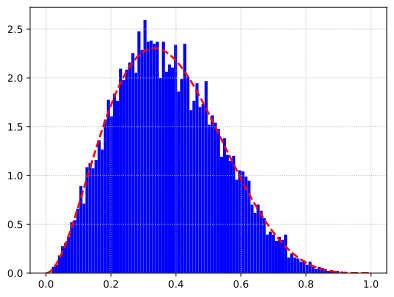

In [1]:
from scipy.stats import beta, gamma
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

def beta_hist(a, b, N=10000):
    xs = np.linspace(0.001, 0.999, num=1000)
    plt.hist(beta(a, b).rvs(size=N), bins=100, color='b', density=True)
    plt.plot(xs, beta(a, b).pdf(xs), c='r', lw=2, ls="--")
    plt.grid(ls=":")
    
beta_hist(3, 5)

#### Experimental Solution (histogram)

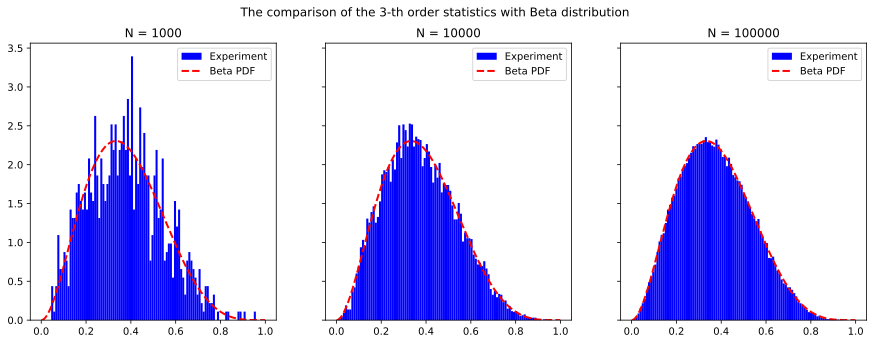

In [13]:
from scipy.stats import beta, gamma
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

def beta_hist(a,b):
    k = a
    n = b + a - 1
    Ns = [1000, 10000, 100000]

    fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    fig.suptitle(f'The comparison of the {k}-th order statistics with Beta distribution')

    for i, N in enumerate(Ns):
        random_matrix = np.random.uniform(low=0.0, high=1.0, size=(N, n))
        kth_order_statistic = np.sort(random_matrix, axis=1)[:, k-1]

        axs[i].hist(kth_order_statistic, bins=100, density=True, color = 'b', label='Experiment')
        xs = np.linspace(0.001, 0.999, 1000)
        axs[i].plot(xs, beta.pdf(xs, k, n+1-k), c='r', lw=2, ls="--", label='Beta PDF')

        axs[i].set_title(f'N = {N}')
        axs[i].legend()

    plt.show()
    
beta_hist(3,5)

## Task 3.2 (2 points)

* Find KL divergence between $p\sim \mathrm{Geom}(s)$ and $q\sim \mathrm{Geom}(t)$, $0 < s, t < 1$. Is $\mathbb{KL}(p, q) = 0$ when $s = t$? Does equality $\mathbb{KL}(p, q) = \mathbb{KL}(q, p)$ hold? (**1.5 points**)

* Plot the graphs of $\mathbb{KL}(p, q)$ as functions of $s$ for several fixed values of $t$. (**0.5 points**)

### YOUR SOLUTION HERE

Kullback-Leibler divergence quantifies teh "distance" between two probability distributions $p$ and $q$. It is defined as:
$$\mathbb{KL}(p\vert\vert q) = \sum\limits_k p_k\log\frac{p_k}{q_k}$$
Considering two geometric distributions $p$ and $q$ with parameters $s$ and $t$, the probability mass function (PMF) of a geometric distribution is:
$$P(X=k)=(1−p)^{k-1} \cdot p$$

For $p\sim \mathrm{Geom}(s)$ and $q\sim \mathrm{Geom}(t)$ their PMFs are:
$$p(k) = (1-s)^{k-1} \cdot s$$
$$q(k) = (1-t)^{k-1} \cdot t$$

Substituting these PMFs into the KL divergence formula, we get:
$$\mathbb{KL}(p\vert\vert q) = \sum\limits_{k=1} (1-s)^{k-1} \cdot s\log\frac{(1-s)^{k-1} \cdot s}{(1-t)^{k-1} \cdot t} = \sum\limits_{k=1} (1-s)^{k-1} \cdot s(\log\frac{s}{t} + (k-1)\log\frac{(1-s)}{(1-t)}) $$

When the parameters $s$ and $t$ are equal, the two distributions $p$ and $q$ are identical. This means $p(k) = q(k)$ for all k, and the KL divergence becomes:
$$ (p||q) = 0 $$
because $\log(1) = 0$ for all terms in summation.

In general, $\mathbb{KL}(p, q) \neq \mathbb{KL}(q, p)$. This assymetry indicates that $\textbf{KL divergence is not symmetric}$ measure of distance between probability distributions.


In [34]:
def KL_dvrg_geom(s, t):
    return np.log(s/t) + ((1 - s)/s) * np.log((1 - s)/(1 - t))

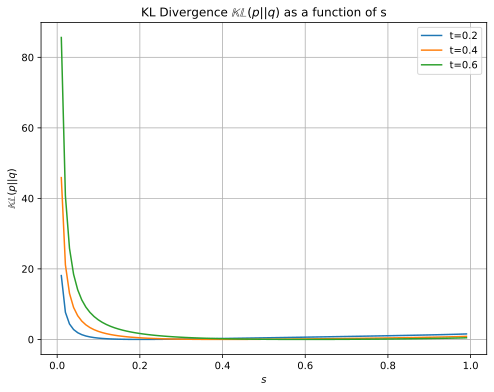

In [35]:
s_values = np.linspace(0.01, 0.99, 100)
t_values = [0.2, 0.4, 0.6]

plt.figure(figsize=(8,6))
for t in t_values:
    kl_divrg = [KL_dvrg_geom(s,t) for s in s_values]
    plt.plot(s_values, kl_divrg, label=f't={t}')

plt.title("KL Divergence $\mathbb{KL}(p || q)$ as a function of s")
plt.xlabel("$s$")
plt.ylabel("$\mathbb{KL}(p||q)$")
plt.legend()
plt.grid()
plt.show()


## Task 3.3 (2 points)

For a one-dimensional gaussian $\xi \sim \mathcal N(\mu, \sigma^2)$ there are well-known rules of one, two and three sigmas:

* one-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant \sigma) = \Phi(1) - \Phi(-1) \approx 0.6827$ 
* two-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant 2\sigma) = \Phi(2) - \Phi(-2) \approx 0.9545$ 
* three-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant 3\sigma) = \Phi(3) - \Phi(-3) \approx 0.9973$ 

```{figure} https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/201202/20120208160239-1_0.jpg?itok=1X1a_HCs
:align: center
```

In [37]:
from scipy.stats import norm

norm.cdf(1) - norm.cdf(-1), norm.cdf(2) - norm.cdf(-2), norm.cdf(3) - norm.cdf(-3)

(0.6826894921370859, 0.9544997361036416, 0.9973002039367398)

Compute analagous values for a 2-d gaussian distribution $\boldsymbol \xi \sim \mathcal N(\boldsymbol 0, \boldsymbol I_2)$. Namely, find $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 1)$, $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 2)$, $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 3)$

* analytically (**1 point**)
* numerically, using `scipy` or Monte Carlo methods (**1 point**)

### YOUR SOLUTION HERE

To calculate probabilities involving the Euclidean norm of two-dimensional normal random vector, we start by using the formula of its probability density function (PDF).
The PDF of the Euclidean norm $P(\Vert\boldsymbol \xi\Vert_2)$ is given by:
$$f_{R}(r) = re^{-\frac{r^{2}}{2}}$$, where $r \ge 0$.

The Cumulative Distribution Function (CDF), which represents the probability that $R$ is less than or equal to a given value $r$, is obtained by integrating the PDF from 0 to $r$:
$$F_{R}(r) = \int_{0}^r se^{-\frac{s^{2}}{2}}ds = 1 - e^{-\frac{r^{2}}{2}} $$

Using the CDF, it is possible to compute the probabilities for $R$ being less or equal to specific values:

$$\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 1) = 1 - e^{-\frac{1^{2}}{2}} $$
$$\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 2) = 1 - e^{-\frac{2^{2}}{2}} $$
$$\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 3) = 1 - e^{-\frac{3^{2}}{2}} $$.

### Numerical Solution
Monte Carlo simulation. This method involves generating many samples from a 2D gaussian distribution and estimating the probability as the fraction of points within a distance $r$ from the origin. 

In [40]:
from numpy.random import normal
from numpy.linalg import norm

n_samples = 1000000
samples = normal(size=(n_samples,2))
dist=norm(samples, axis=1)

mc_probs = [(dist <= r).mean() for r in [1, 2, 3]]
mc_probs

[0.393829, 0.864841, 0.98887]

## Task 3.4 (1 point)


Let $X_1, \ldots, X_n$ is an i.i.d. sample form $U[0, 2\theta]$. The parameter $\theta$ can be estimated as
$\widehat\theta = \overline X_n$ (sample average) or $\tilde\theta = \mathrm{med}(X_1, \ldots, X_n)$ (sample median). According to [ML Handbook](https://education.yandex.ru/handbook/ml/article/parametricheskie-ocenki#svojstva-parametricheskih-ocenok), both estimations are unbiased, and $\mathbb V \widehat\theta = \frac{\theta^2}{3n}$, $\mathbb V \tilde\theta = \frac{\theta^2}{n+3}$. Hence, due to the central limit theorem

$$
    \widehat\theta \approx \mathcal N\Big(\theta, \frac{\theta^2}{3n}\Big), \quad
    \tilde\theta \approx \mathcal N\Big(\theta, \frac{\theta^2}{n+3}\Big), \quad n \gg 1.
$$

Plot two histograms on the same plot verifying this theoretical statements. Add two dashed lines for gaussians as it done {ref}`here <CLT>`. Try different values of $n$: $100$, $1000$, $10^4$, $10^5$.

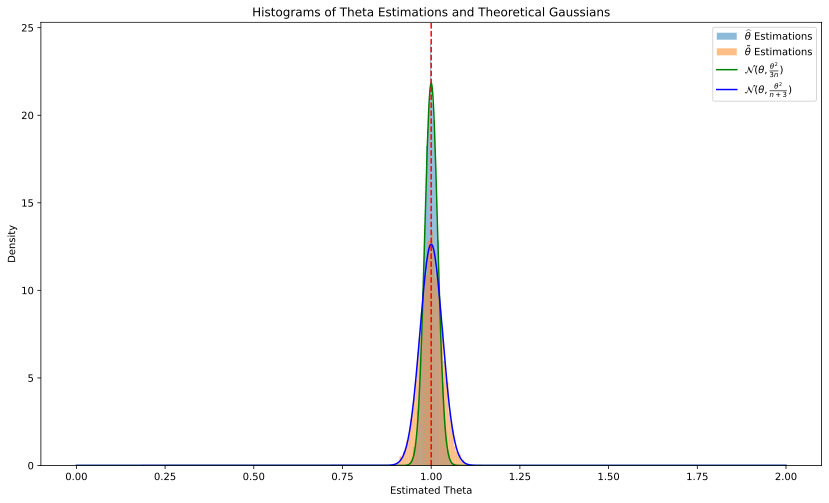

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm

theta = 1

n = 1000


samples = uniform.rvs(0, 2*theta, size=n)


var_sample_avg = theta**2 / (3*n)
var_sample_med = theta**2 / (n+3)


x = np.linspace(0, 2*theta, 1000)
normal_avg = norm.pdf(x, theta, np.sqrt(var_sample_avg))
normal_med = norm.pdf(x, theta, np.sqrt(var_sample_med))


estimates_avg = []
estimates_med = []


for _ in range(10000):
    samples = uniform.rvs(0, 2*theta, size=n)
    estimates_avg.append(np.mean(samples))
    estimates_med.append(np.median(samples))


plt.figure(figsize=(14,8))
plt.hist(estimates_avg, bins=50, density=True, alpha=0.5, label=r'$\widehat{\theta}$ Estimations')
plt.hist(estimates_med, bins=50, density=True, alpha=0.5, label=r'$\tilde{\theta}$ Estimations')


plt.plot(x, normal_avg, 'g', linewidth=1.5, label=r'$\mathcal{N}(\theta, \frac{\theta^2}{3n})$')
plt.plot(x, normal_med, 'b', linewidth=1.5, label=r'$\mathcal{N}(\theta, \frac{\theta^2}{n+3})$')
plt.axvline(x=theta, color='r', linestyle='--')

plt.title('Histograms of Theta Estimations and Theoretical Gaussians')
plt.xlabel('Estimated Theta')
plt.ylabel('Density')
plt.legend()
plt.show()
